Violeta García

<img style="float: left; margin: 15px 15px 15px 15px;" src="http://www.unionjalisco.mx/sites/default/files/styles/galeria/public/field/image/iteso_3_1.jpg?itok=M6pp1pEQ" width="180" height="50" />

# Simulación de Procesos Financieros

## <font color= blue > Tarea IV 
   En esta tarea se resolveran los primeros ejercicios que impliquen simular para buscar respuestas a ciertas preguntas referentes al caso que se presente.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

## Ejercicio 1
**Un juego de lanzamiento de una moneda**

Eres el afortunado ganador de un concurso de sorteos. Su premio es unas vacaciones con todos los gastos pagados en un hotel importante en Las Vegas, incluyendo algunas fichas para apostar en el casino del hotel. Al ingresar al casino, descubres que, ademas de los juegos habituales (blackjack, ruleta, etc.), ofrecen un juego interesante con las siguientes reglas:

*Reglas del juego*

1) Cada jugada del juego consiste en lanzar repetidamente una moneda imparcial hasta que la diferencia entre el numero de caras lanzadas y el numero de sellos es 3

2) Si decides jugar el juego, debes pagar 1 por cada lanzamiento de la moneda. No puedes salir durante una jugada del juego.

3) Usted recibe 8 al final de cada uno de los juegos. Por lo tanto, ganas dinero si el numero de lanzamientos requeridos es menor a 8, pero pierdes si se requieren mas de 8 lanzamientos.


In [2]:
n = 50
def CaraSello(flips):
    coin = np.random.rand(flips)
    cara = 0 ; sello = 0; flip = 0; profit = 0
    while abs(cara - sello) < 3 :
        if coin[flip] < 0.5:
            cara += 1
        else:
            sello += 1
        flip += 1
    profit = 8 - flip
    return np.array([flip, cara, sello, profit])

simulaciones = 100
ans = np.array([CaraSello(n) for i in range(simulaciones)])
#print(ans)

a) ¿Cuál es el promedio de tiradas hasta que termina el juego?

In [3]:
promedio = np.mean(ans[:,0])
print('Promedio = ',promedio)

Promedio =  9.66


b) para el inciso anterior ¿Cuál es la probabilidad de que tires mas de 10 veces para terminar el juego?, ¿y de que tires menos de 5?

In [4]:
probMas10 = len([x for x in ans[:,0] if x > 10])/len(ans[:,0])
print('Probabilidad de tirar mas de 10 veces: ',probMas10)

probMen5 = len([x for x in ans[:,0] if x < 5])/len(ans[:,0])
print('Probabilidad de tirar menos de 5 veces: ',probMen5)

Probabilidad de tirar mas de 10 veces:  0.35
Probabilidad de tirar menos de 5 veces:  0.18


c) Imagina que lanzas 100 tiros exactos la moneda ¿Cual es el valor esperado de dinero ganado/perdido? ¿Y tu valor mas probable? ¿Cual es la probabilidad de ganar dinero (Grafica el histograma de simulaciones)

Promedio =  -1.66
Probabilidad de ganar:  0.56


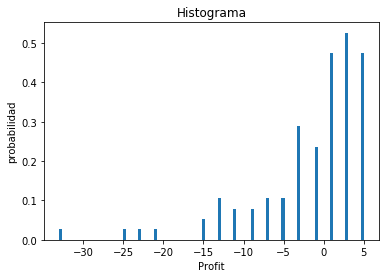

In [5]:
promedio = np.mean(ans[:,3])
print('Promedio = ',promedio)

probGan = len([x for x in ans[:,3] if x > 0])/len(ans[:,3])
print('Probabilidad de ganar: ',probGan)

plt.hist(ans[:,3], 100, density = True)
plt.xlabel('Profit')
plt.ylabel('probabilidad')
plt.title('Histograma')
plt.show()

d) Imagina que comienzas con 30 ¿Cuál es el valor esperado del numero de tiradas que debes realizar antes de quedarte sin dinero? ¿Cual es la probabilidad de realizar mas de 150 tiradas? (grafica el histograma correspondiente)

In [ ]:
n = 50
def CaraSello_(flips):
    coin = np.random.rand(flips)
    cara = 0 ; sello = 0; flip = 0; profit = 30
    while profit >= 0 and abs(cara - sello) < 3 :
        profit -= 1
        if coin[flip] < 0.5:
            cara += 1
        else:
            sello += 1
        flip += 1
        print(profit)
    profit = +8
    return np.array([flip, cara, sello, profit])

simulaciones = 30
ans = np.array([CaraSello_(n) for i in range(simulaciones)])
print(ans)
pierde = sum([x for x in ans[:,3]])
print(pierde)

## Ejercicio 2
**Rustbelt Manufacturing Company emplea un equipo de mantenimiento para reparar sus maquinas segun sea necesario. La gerencia ahora quiere un estudio de simulacion para analizar cuál debe ser el tamaño de la tripulacion, donde los tamaños de la cuadrilla considerados son 2, 3 y 4. El tiempo requerido por la cuadrilla para repararuna máquina tiene una distribucion uniforme durante el intervalo de 0 a dos veces la media, donde la media depende del tamaño de la cuadrilla. La media es de 4 horas con dos miembros de la cuadrilla, 3 horas con tres miembros de la cuadrilla y 2 horas con cuatro miembros. El tiempo entre las interrupciones de alguna máquina tiene una distribución uniforme entre 3.5 y 9 horas.**

Cuando una máquina se descompone y por lo tanto requiere reparacion, la gerencia desea realizar los siguientes analisis:

Nota: Se quiere analizar el tiempo de espera de una máquina descompuesta, por lo tanto se tienen que analizar los tiempos de reparación y los tiempos de descomposición y ver si cuando se dana una nueva maquina todavía están reparando una máquina anterior o ya la repararon.


In [22]:
def cuadrilla(n, media):
    repara = np.random.uniform(0, 2, size = n)
    tiempoRepa = repara*media
    tiempoDaño = np.random.uniform(3.5, 9, size = n)
    diferencia = tiempoDaño - tiempoRepa
    tiempoEspera = np.zeros(n)
    h = 0 
    while n > h:
        if h != 0 and diferencia[h-1]<0:
            tiempoEspera[h] = diferencia[h] + tiempoEspera[h-1] 
        elif diferencia[h] > 0:
            tiempoEspera[h] = 0
        else:
            tiempoEspera[h] = diferencia[h]
        h += 1
    return np.transpose(np.array([tiempoRepa, tiempoDaño, diferencia, abs(tiempoEspera)]))

a) Comienza con una cuadrilla de tamaño 2, ¿Cuál es el tiempo medio de espera para reparar la máquina? ¿Cuál es la probabilidad de que una máquina tenga que esperar más de 8 horas para ser reparada? (dibuja el histograma correspondiente).

Probabilidad de que una maquina espera mas de 8 horas para repara:  0.002


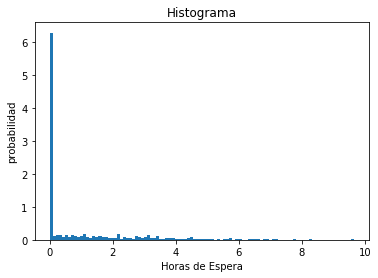

In [24]:
maquinas = 1000
media2 = 4
DosPersonas = cuadrilla(maquinas, media2)
Promedio = np.mean(DosPersonas[:,3])
print('Promedio de espera con cuartilla de 2 = ', Promedio)

probMaq8 = len([x for x in DosPersonas[:,3] if x > 8])/len(DosPersonas[:,3])
print('Probabilidad de que una maquina espera mas de 8 horas para reparar: ',probMaq8)

plt.hist(DosPersonas[:,3], 100, density = True)
plt.xlabel('Horas de Espera')
plt.ylabel('probabilidad')
plt.title('Histograma')
plt.show()

b) Repita el inciso a pero para una cuadrilla de tamaño 3, ¿Cuál es el tiempo medio de espera para reparar la máquina? ¿Cuál es la probabilidad de que una máquina tenga que esperar más de 3 horas para ser reparada? (dibuja el histograma correspondiente)

Promedio de espera con cuartilla de 3 =  0.33010375752518256
Probabilidad de que una maquina espera mas de 3 horas para reparla:  0.038


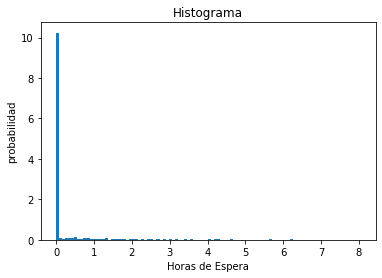

In [27]:
maquinas = 1000
media3 = 3
TresPersonas = cuadrilla(maquinas, media3)
Promedio = np.mean(TresPersonas[:,3])
print('Promedio de espera con cuartilla de 3 = ', Promedio)

probMaq3 = len([x for x in TresPersonas[:,3] if x > 3])/len(TresPersonas[:,3])
print('Probabilidad de que una maquina espera mas de 3 horas para reparla: ',probMaq3)

plt.hist(TresPersonas[:,3], 100, density = True)
plt.xlabel('Horas de Espera')
plt.ylabel('probabilidad')
plt.title('Histograma')
plt.show()

c) Repita el inciso b para una cuadrilla de tamaño 4.

Promedio de espera con cuartilla de 4 =  0.0
Probabilidad de que una maquina espera mas de 3 horas para reparla:  0.0


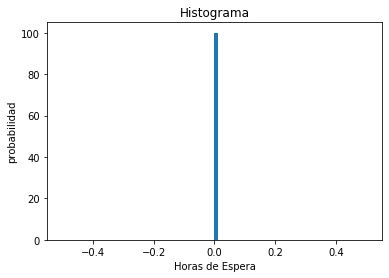

In [26]:
maquinas = 10
media4 = 2
CuatroPersonas = cuadrilla(maquinas, media4)
Promedio = np.mean(CuatroPersonas[:,3])
print('Promedio de espera con cuartilla de 4 = ', Promedio)

probMaq3 = len([x for x in CuatroPersonas[:,3] if x > 3])/len(CuatroPersonas[:,3])
print('Probabilidad de que una maquina espera mas de 3 horas para reparla: ',probMaq3)

plt.hist(CuatroPersonas[:,3], 100, density = True)
plt.xlabel('Horas de Espera')
plt.ylabel('probabilidad')
plt.title('Histograma')
plt.show()

## Ejercicio 3
El juego  de dados requiere que el jugador arroje dos dados una o más veces hasta que se llegue a una decisión sobre si él (o ella) gana o pierde. El gana si la primera tirada resulta en una suma de 7 u 11 ó, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y la misma suma reaparece antes de que aparezca una suma de 7. Por el contrario, pierde si la primera tirada resulta en una suma de 2, 3 o 12 o, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y aparece una suma de 7 antes de la primera suma reaparece.

a) calcule la probabilidad de ganar corriendo 10,000 simulaciones.

b) Imagina que cada juego ganas o pierdes 50. Si inicias con 500. ¿Cuál es tu valor esperado de dinero después de 10 juegos? ¿y el más probable? ¿Cuál es la probabilidad de ganar dinero?.


In [62]:
n = 30
def Dados(n):
    dado1 = np.random.randint(1,7, size = n); dado2 = np.random.randint(1,7, size = n)
    suma = dado1 + dado2
    el = 0; ella = 0; i = 0
    if suma[0] in [7, 11]:
        el = 1
        
    elif suma[0] in [2, 3, 12]:
        ella = 1
    else:
        while suma[i+1] != 7:
            if suma[0] in [4, 5, 6, 8, 9, 10] and suma[i+1] == suma[0] :
                el = 1
                break
            i += 1
        if el == 1:
            ella = 0
        else:
            ella = 1
        i += 1
    answer = np.array([i+1, el, ella])
    return answer

In [66]:
simulaciones = 10000
ans = np.array([Dados(n) for i in range(simulaciones)])

probGan = len([x for x in ans[:,1] if x > 0])/len(ans[:,1])
print('Probabilidad de ganar: ',probGan)

Probabilidad de ganar:  0.4998


## Ejercicio 4
Una inversión  en cetes actualmente promete un rendimiento que va entre el 8 % y el 12 % anual

a) Considera la cantidad total de dinero que obtendrás al final del año dado una inversión inicial de \\$300,000. Realiza un programa que simule 10,000 escenarios diferentes que puedan suceder, calcula su media, su desviación estándar y grafica su histograma.

media =  30056.116400479877
desviacion =  3474.1966116341687
tasa =  0.10018705466826626


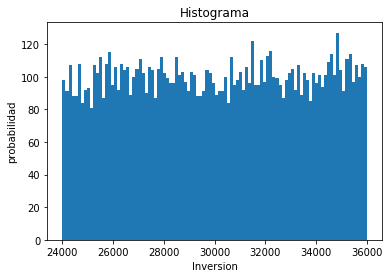

In [28]:
inicial = 300000
simulaciones = 10000
tasa = (np.random.rand(simulaciones)*(12-8)+8)/100

rendimiento = inicial*tasa

print('media = ', np.mean(rendimiento))
print('desviacion = ', np.std(rendimiento))

print('tasa = ', np.mean(tasa))

plt.hist(rendimiento, 100, density = False)
plt.xlabel('Inversion')
plt.ylabel('probabilidad')
plt.title('Histograma')
plt.show()

b) Ahora supón que dejas el dinero durante 6 años, Realiza un programa que simule 10,000 escenarios diferentes que puedan suceder, calcula su media, su desviación estándar y grafica su histograma. ¿Cuál es la probabilidad de ganar más de \$58,000? ¿Cuál es la probabilidad de ganar menos de \\$55,000?.

media =  232039.60850563712
desviacion =  33495.95409331445


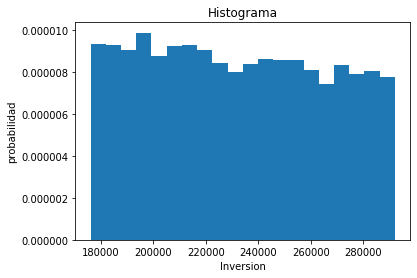

Probabilidad de ganar mas de $58,000:  1.0
Probabilidad de tirar menos de $55,000:  0.0


In [29]:
inicial = 300000
simulaciones = 10000
tasa = (np.random.rand(simulaciones)*(12-8)+8)/100

ganancia = inicial*(1+tasa)**6
rendimiento = ganancia - inicial
print('media = ', np.mean(rendimiento))
print('desviacion = ', np.std(rendimiento))

plt.hist(rendimiento, 20, density = True)
plt.xlabel('Inversion')
plt.ylabel('probabilidad')
plt.title('Histograma')
plt.show()

probMas58 = len([x for x in rendimiento if x > 58000])/len(rendimiento)
print('Probabilidad de ganar mas de $58,000: ',probMas58)

probMen55 = len([x for x in rendimiento if x < 55000])/len(rendimiento)
print('Probabilidad de tirar menos de $55,000: ',probMen55)

c) Repite el inciso b, pero suponiendo que el rendimiento es discreto, es decir, solo puede tomar los valores enteros 8,9,10,11,12. ¿Cuál es la probabilidad de ganar entre \\$53,000 y \\$56,000?

media =  232039.60850563712
desviacion =  33495.95409331445
tasa =  0.10200000000000001
ganancia =  38673.26808427285


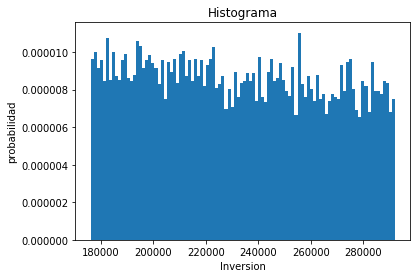

Probabilidad de ganar entre $56,000 y $53,000:  0.0


In [30]:
inicial = 300000
simulaciones = 5
tasa = (np.random.randint(8,13, size = simulaciones))/100

print('media = ', np.mean(rendimiento))
print('desviacion = ', np.std(rendimiento))
print('tasa = ', np.mean(tasa))
print('ganancia = ', np.mean(rendimiento)/6)

plt.hist(rendimiento, 100, density = True)
plt.xlabel('Inversion')
plt.ylabel('probabilidad')
plt.title('Histograma')
plt.show()

probEntre = len([x for x in rendimiento if x > 53000 and x < 56000])/len(rendimiento)
print('Probabilidad de ganar entre $56,000 y $53,000: ',probEntre)
